#NaiveBayes

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem.


Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

 P(A|B) = {P(B|A) P(A)}|{P(B)} 


Univariate = One Variable that changes 
Bivariate  = Two variable that changes 
Multivariate = Three or More Variable that changes 


<class 'numpy.ndarray'>


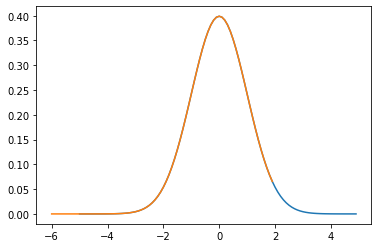

In [25]:
import scipy.stats
import matplotlib.pyplot as plt
mean = 0
standard_deviation = 1

import numpy as np
x1_values = np.arange(-5, 5, 0.1)
x2_values = np.arange(-6, 2, 0.1)
y_values = scipy.stats.norm(mean, standard_deviation)  ##returns an object representing probability density function
print(type(x1_values))

plt.plot(x1_values, y_values.pdf(x1_values))
plt.plot(x2_values, y_values.pdf(x2_values))
plt.show();

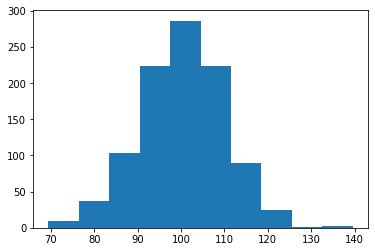

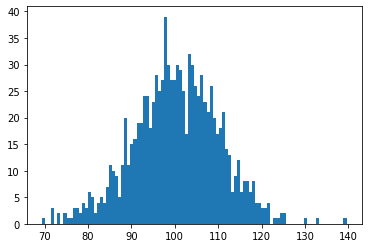

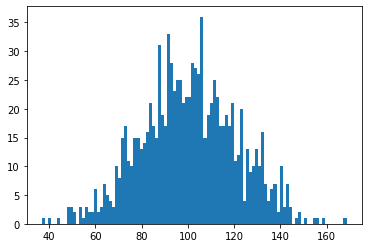

In [26]:
#ref https://towardsdatascience.com/how-to-explain-data-using-gaussian-distribution-and-summary-statistics-with-python-cb960f213ab3
##setting the seed for the random generation
np.random.seed(1)
##generating univariate data
#sigma * np.random.randn(...) + mu
data = 10 * np.random.randn(1000) + 100  ## sample(s) from standard normal distribution N(0,1).
##plotting the data
plt.hist(data)
plt.show()

plt.hist(data, bins=100)
plt.show()

data = 20 * np.random.randn(1000) + 100  ## multiplicative shift
plt.hist(data, bins=100)
plt.show()

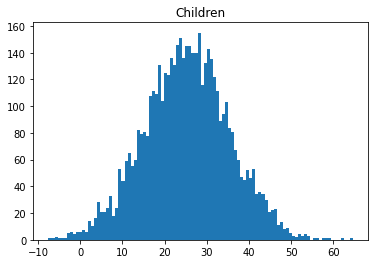

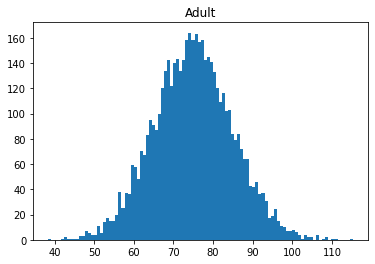

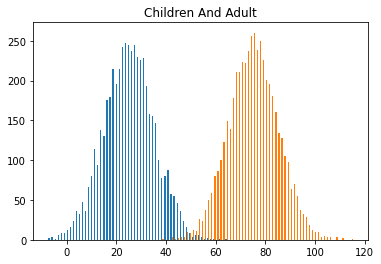

In [27]:
##setting the seed for the random generation
np.random.seed(1)
##generating univariate data
#predict a person is adult/child based on weight 
#sigma * np.random.randn(...) + mu
child_data =  10*np.random.randn(5000) + 25
##plotting the data
plt.hist(child_data, bins=100)
plt.title("Children")
plt.show()


adult_data =  10*np.random.randn(5000) + 75  ## additive shift
plt.hist(adult_data, bins=100)
plt.title("Adult")
plt.show()

plt.hist((child_data, adult_data), bins=100)
plt.title("Children And Adult")
plt.show()

In [28]:
print('#child={}, #adult={}'.format(len(child_data), len(adult_data)))

print("child mean={} var={}".format(child_data.mean(), child_data.var()))
print("adult mean={} var={}".format(adult_data.mean(), adult_data.var()))
#P(Y=0|X=𝑥₀)  and P(Y=1|X=𝑥₀), which one is the larger one. Y=0 means the person is child, Y=1 means the person is adult.

#child=5000, #adult=5000
child mean=25.24298788442464 var=100.51024703791407
adult mean=74.95246524955746 var=98.96218357173021


X = np.concatenate((child_data, adult_data), axis=0)
X1 = X.reshape(len(X),1)
print(X1.shape)

X2=X.reshape(-1,1)
X2.shape

In [29]:
from sklearn.model_selection import train_test_split
y =[]
y[:5000] = [0]*5000
y[5001:] = [1]*5000
X = np.concatenate((child_data, adult_data), axis=0)
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Len ={},{}".format(len(X), len(y)))
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
print('Accuracy {:.2f}'.format(gnb.score(X_test, y_test)))

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes (in %):", metrics.accuracy_score(y_test, y_pred)*100)

Len =10000,10000
Accuracy 0.99
Gaussian Naive Bayes (in %): 99.35000000000001


In [30]:
X_test = np.array([10, 25, 50,  51, 75, 100])
X_test = X_test.reshape(-1,1)
result = gnb.predict(X_test)
print('Result ={}'.format(result))

Result =[0 0 0 1 1 1]


In [31]:
# load the iris dataset

#**************https://i.imgur.com/PQqYGaW.png**************

# ref : https://www.geeksforgeeks.org/naive-bayes-classifiers/
from sklearn.datasets import load_iris
from sklearn import metrics
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
#print(iris.DESCR)

In [32]:
names = iris.target_names
print('Feature Names {}'.format(iris.feature_names))
print('Species Names {}'.format(names))

Feature Names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Species Names ['setosa' 'versicolor' 'virginica']


In [33]:
X = iris.data
y = iris.target
print(len(X))

print(df.head())
print(y[0:4])
print(y[50:54])
print(y[100:104])

150
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0]
[1 1 1 1]
[2 2 2 2]


In [34]:
title=iris.feature_names
print(title)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


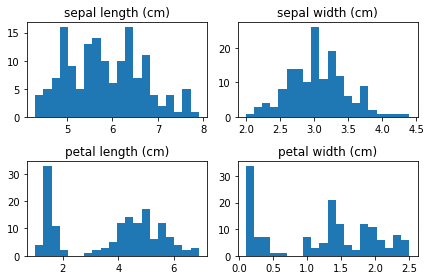

In [35]:
#Univariate analysis of iris data
#************ https://medium.com/analytics-vidhya/exploratory-data-analysis-uni-variate-analysis-of-iris-data-set-690c87a5cd40

#df.iloc[:,1]


#plt.hist((df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]), bins=10)

fig, ax = plt.subplots(2, 2)
plt.subplot(2,2,1)
plt.hist((df.iloc[:,0]), bins=20)
plt.title(title[0])

plt.subplot(2,2,2)
plt.hist((df.iloc[:,1]), bins=20)
plt.title(title[1])

plt.subplot(2,2,3)
plt.hist((df.iloc[:,2]), bins=20)
plt.title(title[2])

plt.subplot(2,2,4)
plt.hist((df.iloc[:,3]), bins=20)
plt.title(title[3])
fig.tight_layout()
plt.show()

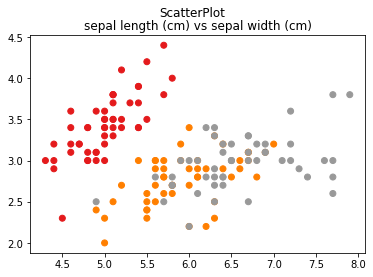

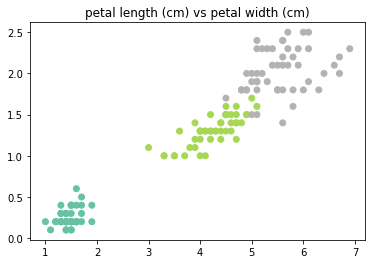

In [36]:
strtitle = title[0] + " vs " + title[1]
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=y, cmap=plt.cm.Set1)
plt.title(strtitle)
plt.suptitle("ScatterPlot")
plt.show()

strtitle = title[2] + " vs " + title[3]
plt.scatter(df.iloc[:,2], df.iloc[:,3], c=y, cmap=plt.cm.Set2)
plt.title(strtitle)
plt.show()

In [37]:
print(title[0] + " and " + title[1])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:,:2], y, test_size=0.4, random_state=1)
  
from sklearn.naive_bayes import GaussianNB
gnb01 = GaussianNB()
gnb01.fit(X_train, y_train)

y_pred = gnb01.predict(X_test)
print("Gaussian Naive Bayes (in %):", metrics.accuracy_score(y_test, y_pred)*100)

sepal length (cm) and sepal width (cm)
Gaussian Naive Bayes (in %): 78.33333333333333


In [38]:
print(title[2] + " and " + title[3])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:,2:], y, test_size=0.4, random_state=1)
  
gnb23 = GaussianNB()
gnb23.fit(X_train, y_train)

print(X_train.shape)  
y_pred = gnb23.predict(X_test)
print("Gaussian Naive Bayes (in %):", metrics.accuracy_score(y_test, y_pred)*100)

petal length (cm) and petal width (cm)
(90, 2)
Gaussian Naive Bayes (in %): 96.66666666666667


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
  
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
y_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes (in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes (in %): 95.0


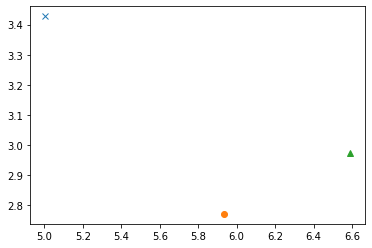

In [40]:
#http://isle.illinois.edu/speech_web_lg/coursematerials/ece417/17fall/ece417fa2017lecture12.html
mu0 = np.mean(X[0:50,:],axis=0)
mu1 = np.mean(X[50:100,:],axis=0)
mu2 = np.mean(X[100:150,:],axis=0)
plt.plot(mu0[0],mu0[1],'x',mu1[0],mu1[1],'o',mu2[0],mu2[1],'^')
plt.show()

Sig0 = np.cov(X[0:50,:],rowvar=False)
Sig1 = np.cov(X[50:100,:],rowvar=False)
Sig2 = np.cov(X[100:150,:],rowvar=False)

In [41]:
from scipy.stats import multivariate_normal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
prob = []
func = multivariate_normal(mu0, Sig0)
pdf0 = func.pdf(X_test)

func = multivariate_normal(mu1, Sig1)
pdf1 = func.pdf(X_test)

func = multivariate_normal(mu2, Sig2)
pdf2 = func.pdf(X_test)

prob.append(pdf0)
prob.append(pdf1)
prob.append(pdf2)

import numpy as np
max_prob  = np.argmax(prob, axis = 0)

#One Example
print("Input {}".format(X_test[0]))
print("Per class 0={}, 1={}, 2={}".format(pdf0[0], pdf1[0], pdf2[0]))
print("Result ={}".format(max_prob[0]))

#Overall
print(X_test.shape)
print("Multivariate Gaussian (in %):", metrics.accuracy_score(y_test, max_prob)*100)

Input [5.8 4.  1.2 0.2]
Per class 0=0.1050716817154039, 1=7.564244948183633e-38, 2=7.778491358233817e-57
Result =0
(60, 4)
Multivariate Gaussian (in %): 100.0


End of Session